In [23]:
#import modules
import numpy as np
from sklearn.cluster import KMeans, OPTICS, DBSCAN, HDBSCAN, SpectralClustering, MeanShift,AffinityPropagation
import pickle
from tqdm import tqdm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [24]:
#open embeddings with pickle
with open('embeddings_all_l0.9.pkl', 'rb') as file:
    data = pickle.load(file)

X = data["outputs"]
y = data["labels"]
X = np.array(X)
y = np.array(y)

In [25]:
#Creating a matrix of centroid for each class
dct = {i:[] for i in range(100)}
for i in tqdm(range(100)):
    for j in range(y.shape[0]):
        if i == y[j]:
            dct[i].append(X[j])

dct = {i:np.array(dct[i]) for i in range(100)}
dct = {i : np.mean(dct[i], axis=0) for i in range(100)}
X = np.array([dct[i] for i in range(100)])

100%|██████████| 100/100 [00:00<00:00, 105.31it/s]


In [4]:
#Running PCA with 2 Principal Components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [21]:
#Applying different clustering algorithms
kmeans = KMeans(n_clusters=10)
labels = kmeans.fit_predict(X_pca)

db = DBSCAN(eps = 1.5, min_samples=2).fit(X_pca)
spectral = SpectralClustering(n_clusters=10, assign_labels='discretize').fit(X_pca)
optics = OPTICS(min_samples=2).fit(X_pca)
mean_shift = MeanShift(bandwidth=2).fit(X_pca)
af = AffinityPropagation(affinity='euclidean', max_iter=500).fit(X_pca)

/home/farkhad.akimov/.conda/envs/701p/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


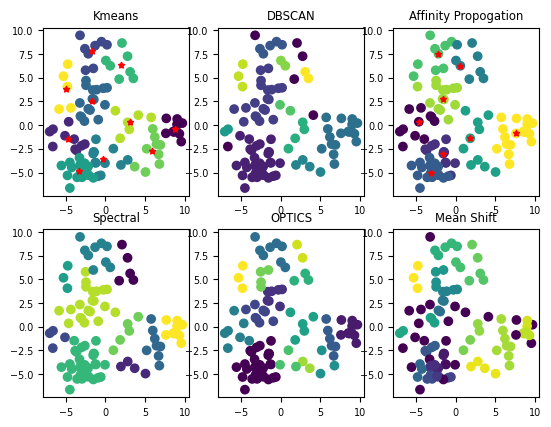

In [22]:
#Plot results of different clutering methods
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'small',
         'xtick.labelsize':'x-small',
         'ytick.labelsize':'x-small'}
pylab.rcParams.update(params)

fig, axs = plt.subplots(2,3)
centroids = kmeans.cluster_centers_
axs[0,0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
axs[0,0].scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'red', marker=(5, 1))
axs[0,0].set_title("Kmeans")

axs[0,1].scatter(X_pca[:, 0], X_pca[:, 1], c=db.labels_)
axs[0,1].set_title("DBSCAN")

axs[1,0].scatter(X_pca[:, 0], X_pca[:, 1], c=spectral.labels_)
axs[1,0].set_title("Spectral")

axs[1,1].scatter(X_pca[:, 0], X_pca[:, 1], c=mean_shift.labels_)
axs[1,1].set_title("OPTICS")

axs[1,2].scatter(X_pca[:, 0], X_pca[:, 1], c=optics.labels_)
axs[1,2].set_title("Mean Shift")

axs[0,2].scatter(X_pca[:, 0], X_pca[:, 1], c=af.labels_)
axs[0,2].scatter(af.cluster_centers_[:,0] , af.cluster_centers_[:,1] , s = 20, color = 'red', marker=(5, 1))
axs[0,2].set_title("Affinity Propogation")

plt.show()